In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly
import os
%matplotlib inline

### Data-data terkait dapat didownload di sini

### Import shape file Indonesia

In [2]:
Indo_map = gpd.read_file('Indonesia_Shp.shp')

In [3]:
Indo_map = Indo_map.dropna()
Indo_map = Indo_map.sort_values('PROVINSI')

### Import Data Excel dari UN SMA Indonesia

In [4]:
UN_Indo = pd.read_excel('Indonesia (Minus Nasional data).xlsx')
UN_Indo = UN_Indo.sort_values('NAMA PROVINSI')

### Cleaning Data dari Nama Provinsi

#### Ketahui nama-nama provinsi yang ada di Indo_map

In [5]:
provinsi_map = [i for i in Indo_map.PROVINSI]

#### Ketahui nama-nama provinsi yang ada di UN_Indo

In [6]:
UN_Indo_map = [x for x in UN_Indo['NAMA PROVINSI']]

#### Mengecek apakah ada perbedaan

In [7]:
for i in UN_Indo_map:
    if i not in provinsi_map:
        print(i)

ACEH
BANGKA BELITUNG
DI YOGYAKARTA
KEPULAUAN RIAU


In [8]:
for i in provinsi_map:
    if i not in UN_Indo_map:
        print(i)

BANGKA-BELITUNG
DAERAH ISTIMEWA YOGYAKARTA
KEPULAUAN-RIAU
NANGGROE ACEH DARUSSALAM


#### Ubah provinsinya di UN_Indo

In [9]:
UN_Indo_map[UN_Indo_map.index('ACEH')] = 'NANGGROE ACEH DARUSSALAM'

#### Cek apakah sudah berubah

In [10]:
UN_Indo_map

['NANGGROE ACEH DARUSSALAM',
 'BALI',
 'BANGKA BELITUNG',
 'BANTEN',
 'BENGKULU',
 'DI YOGYAKARTA',
 'DKI JAKARTA',
 'GORONTALO',
 'JAMBI',
 'JAWA BARAT',
 'JAWA TENGAH',
 'JAWA TIMUR',
 'KALIMANTAN BARAT',
 'KALIMANTAN SELATAN',
 'KALIMANTAN TENGAH',
 'KALIMANTAN TIMUR',
 'KALIMANTAN UTARA',
 'KEPULAUAN RIAU',
 'LAMPUNG',
 'MALUKU',
 'MALUKU UTARA',
 'NUSA TENGGARA BARAT',
 'NUSA TENGGARA TIMUR',
 'PAPUA',
 'PAPUA BARAT',
 'RIAU',
 'SULAWESI BARAT',
 'SULAWESI SELATAN',
 'SULAWESI TENGAH',
 'SULAWESI TENGGARA',
 'SULAWESI UTARA',
 'SUMATERA BARAT',
 'SUMATERA SELATAN',
 'SUMATERA UTARA']

#### Change for the rest of province

In [11]:
UN_Indo_map[UN_Indo_map.index('BANGKA BELITUNG')] = 'BANGKA-BELITUNG'
UN_Indo_map[UN_Indo_map.index('DI YOGYAKARTA')] = 'DAERAH ISTIMEWA YOGYAKARTA'
UN_Indo_map[UN_Indo_map.index('KEPULAUAN RIAU')] = 'KEPULAUAN-RIAU'

#### Check if still any difference between the two

In [12]:
for i in UN_Indo_map:
    if i not in provinsi_map:
        print(i)

#### Put back modified province into the original dataset

In [13]:
UN_Indo['NAMA PROVINSI'] = UN_Indo_map

In [14]:
UN_Indo = UN_Indo.sort_values('NAMA PROVINSI')

In [15]:
UN_Indo.head()

,NO,KODE,NAMA PROVINSI,JUMLAH SATUAN PENDIDIKAN,JUMLAH PESERTA,BAHASA INDONESIA (RERATA NILAI PADA MATA UJI),BAHASA INGGRIS (RERATA NILAI PADA MATA UJI),MATEMATIKA (RERATA NILAI PADA MATA UJI),FISIKA (RERATA NILAI PADA MATA UJI),KIMIA (RERATA NILAI PADA MATA UJI),BIOLOGI (RERATA NILAI PADA MATA UJI),RERATA NILAI
21,22,22,BALI,146,16516,72.67,64.55,46.23,51.68,60.06,61.21,60.87
27,28,28,BANGKA-BELITUNG,67,3855,71.06,52.71,36.74,43.64,49.41,49.49,52.22
29,30,30,BANTEN,504,35672,67.01,53.59,35.84,44.57,49.61,45.65,50.63
25,26,26,BENGKULU,138,8708,66.20,47.27,33.11,40.10,46.38,45.97,47.97
3,4,4,DAERAH ISTIMEWA YOGYAKARTA,174,12433,78.52,66.67,48.04,50.52,58.64,60.83,62.77


#### Masukkan nilai rata-rata UN ke Indo_map

In [16]:
nilai = [a for a in UN_Indo['RERATA NILAI']]

In [17]:
Indo_map['RERATA NILAI'] = nilai

## Visualisasi Start Here

#### Kita bisa visualisasi petanya secara normal, tanpa ada warna

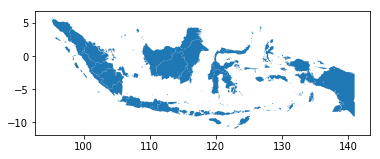

In [18]:
Indo_map.plot()

#### Kita mulai dengan masukkan warna. Sebelumnya harus membuat choropleth terlebih dahulu. Lebih afdol pakai fungsi

In [19]:
def visualize(dataset, columns):
    '''
    Dataset = data yang kita ingin visualisasikan (pastikan ini geopandas dataframe)
    Columns = nilai yang akan menjadi patokan pewarnaan kita
    '''
    vmin, vmax = np.min(dataset[columns]), np.max(dataset[columns])
    
    fig, ax = plt.subplots(1, figsize=(10, 10));
    
    # create map
    
    dataset.plot(column = columns, cmap='Reds', linewidth=0.8, ax=ax, edgecolor="0.8");
    
    ax.axis('off');
    
    # add a title
    
    ax.set_title('Nilai rata-rata UN SMA tahun 2017 di Indonesia', fontdict={'fontsize': '20', 'fontweight' : '3'});

    # create an annotation for the data source

    ax.annotate('Source: Rekap Hasil UN SMA-SMP Kemendikbud',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555');

    # Create colorbar as a legend

    sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))

    # empty array for the data range

    sm._A = []

    # add the colorbar to the figure

    plt.colorbar(sm,fraction=0.036, pad=0.02)

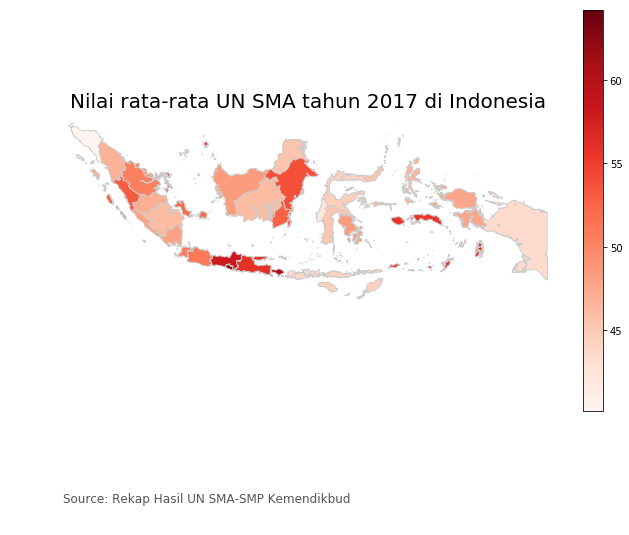

In [20]:
visualize(Indo_map, 'RERATA NILAI')

## Kesimpulan Sederhana